# SVD Image Decomposition / Compression

En este notebook exploramos como podemos utilizar la SVD para realizar la compression de una imagen y ir viendo que a medida que realizamos la reduccion de dimensiones vamos perdiendo informacion y como esto afecta a la misma.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import time

from PIL import Image

## Preparando el set de datos

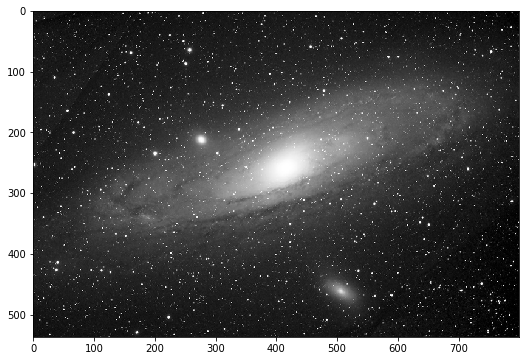

In [2]:
# obtenemos la imagen para poder trabajarla
img = Image.open('andromeda.jpg')
imggray = img.convert('LA')
plt.figure(figsize=(9, 6))
plt.imshow(imggray);

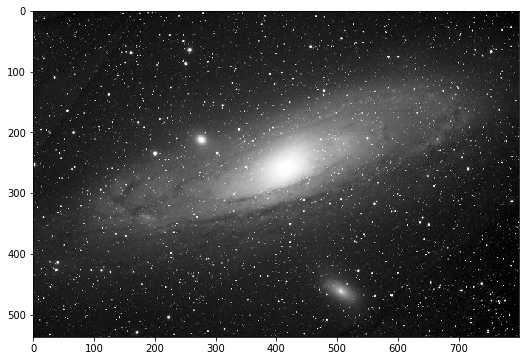

In [6]:
# llevamos la imagen a una representacion matricial con numpy 
# para poder operar
imgmat = np.array(list(imggray.getdata(band=0)), float)
imgmat.shape = (imggray.size[1], imggray.size[0])
imgmat = np.matrix(imgmat)
# realizamos el plot a partir de la matriz (no la imagen)
plt.figure(figsize=(9,6))
plt.imshow(imgmat, cmap='gray');

## SVD

In [4]:
imgmat

matrix([[48., 24., 25., ..., 15.,  0.,  0.],
        [27., 29., 26., ..., 22., 17.,  3.],
        [55., 93., 37., ..., 19., 21., 55.],
        ...,
        [25., 20., 23., ..., 45., 62., 43.],
        [24., 23., 24., ..., 42., 61., 40.],
        [23., 23., 24., ..., 40., 62., 45.]])

In [8]:
# realizamos la descomposicion en valores singulares
u, s, v = np.linalg.svd(imgmat)

In [9]:
# verificamos los valores singulares
s

array([39313.9177176 ,  8484.85259506,  7416.05629503,  3561.31821191,
        2373.10746665,  2089.76846456,  1743.05365342,  1561.80836014,
        1494.01575011,  1427.23650548,  1372.61899183,  1348.46349891,
        1339.94801801,  1318.23851212,  1299.62431403,  1285.05395971,
        1270.38294786,  1255.1217459 ,  1229.29952348,  1218.60936337,
        1213.20396412,  1204.42379512,  1174.73771301,  1169.59173457,
        1165.29618123,  1153.07737483,  1137.56933318,  1128.35770765,
        1125.38765809,  1121.38604148,  1100.90577846,  1093.75588956,
        1089.62813403,  1080.55998085,  1069.62471987,  1056.96118657,
        1054.64263036,  1052.62948212,  1038.39862493,  1033.17020984,
        1022.96343876,  1016.37889657,  1010.30223251,  1005.79866139,
         990.39853569,   986.31706744,   978.21634696,   970.03662716,
         963.63124801,   958.90513075,   957.74527062,   950.663409  ,
         946.06954589,   938.55114415,   937.59289808,   935.38795667,
      

## Analisis de valores singulares

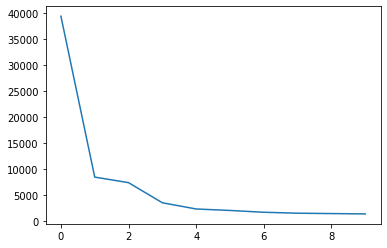

In [10]:
# realizamos un plot de los valores singulaes
# es interesante ir reduciendo el rango para poder 
# verificar algun posible 'codo' para poder considerar 
# la dimensionalidad intrinseca de los datos
#plt.plot(s)
plt.plot(s[:10])

## Reconstruyendo la imagen a partir de los datos reducidos

In [29]:
u[:,:2]

matrix([[-0.0135571 ,  0.00731296],
        [-0.01458063,  0.00700102],
        [-0.014239  ,  0.00924376],
        ...,
        [-0.01413324,  0.00187751],
        [-0.01369515, -0.00013969],
        [-0.01327389,  0.00164602]])

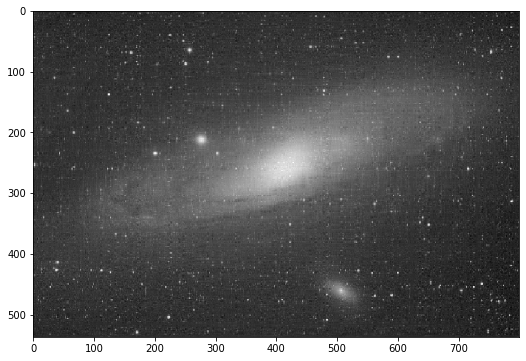

In [23]:
reconstimg = np.matrix(u[:, :55]) * np.diag(s[:55]) * np.matrix(v[:55, :])
plt.figure(figsize=(9,6))
plt.imshow(reconstimg, cmap='gray');

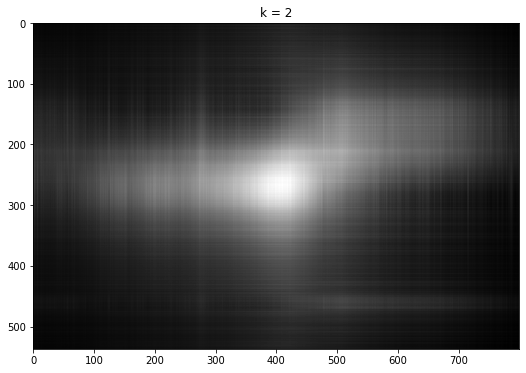

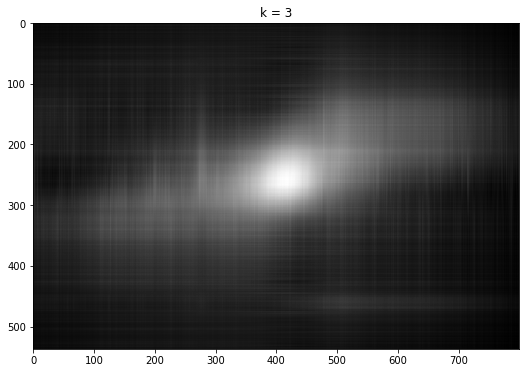

In [30]:
for i in range(2, 4):
    reconstimg = np.matrix(u[:, :i]) * np.diag(s[:i]) * np.matrix(v[:i, :])
    plt.figure(figsize=(9,6))
    plt.imshow(reconstimg, cmap='gray')
    title = "k = %s" % i
    plt.title(title)
    plt.show()

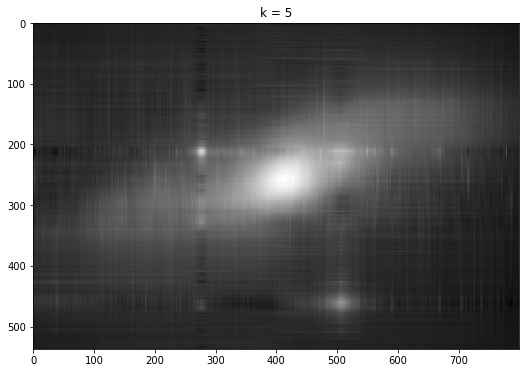

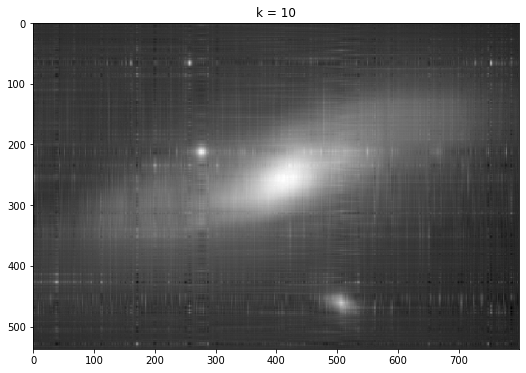

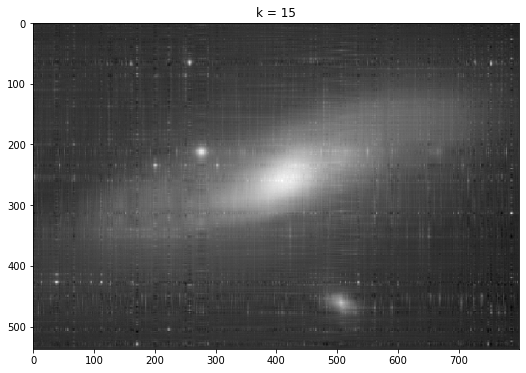

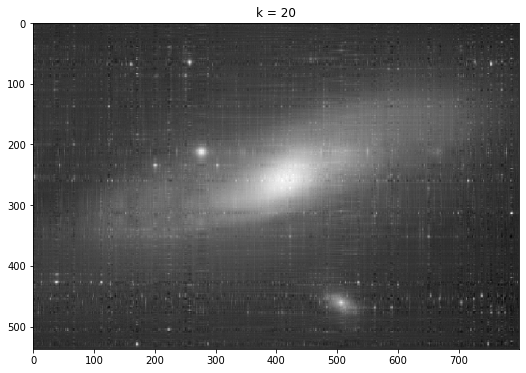

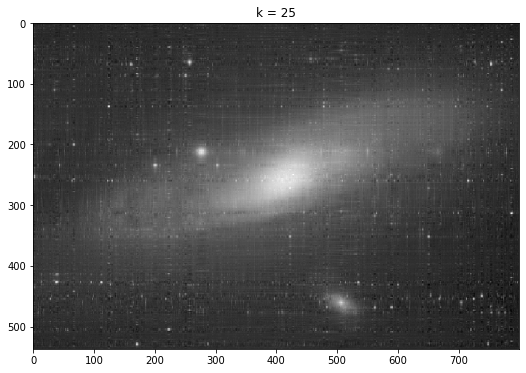

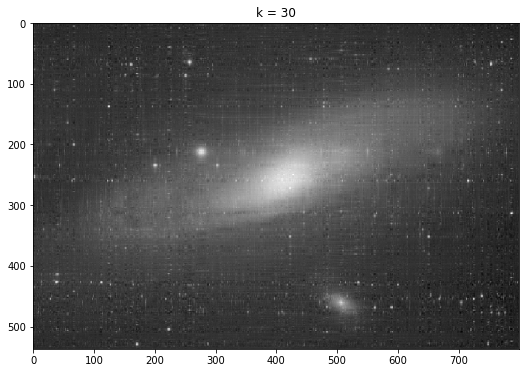

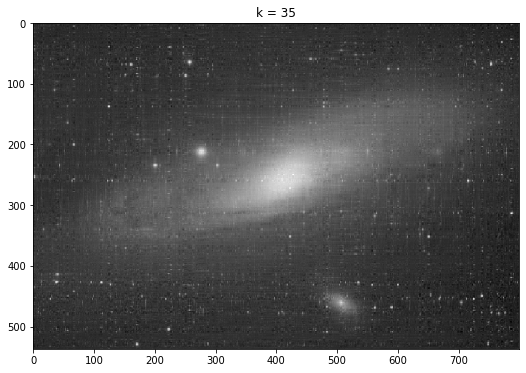

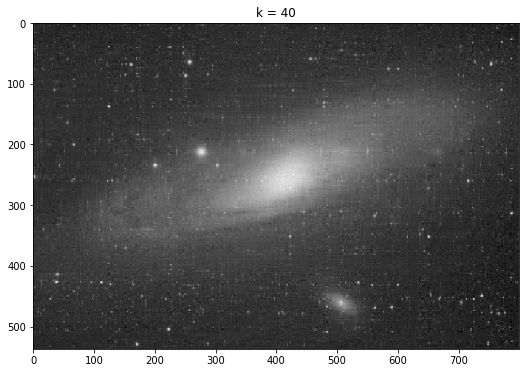

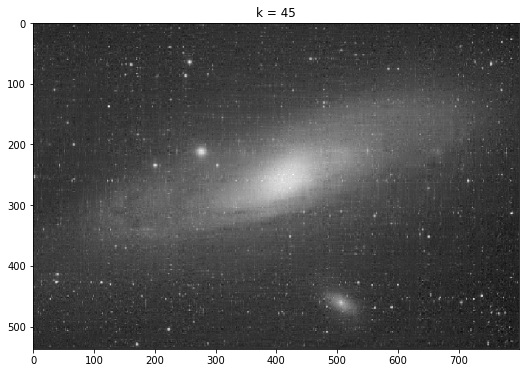

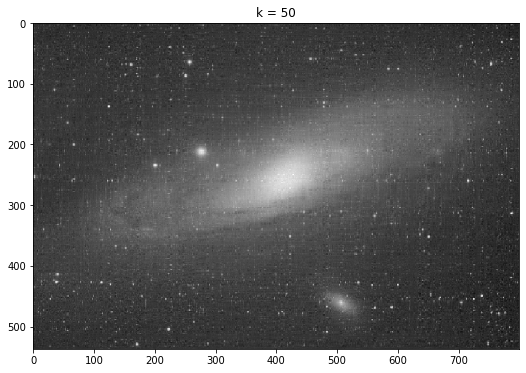

In [31]:
for i in range(5, 51, 5):
    reconstimg = np.matrix(u[:, :i]) * np.diag(s[:i]) * np.matrix(v[:i, :])
    plt.figure(figsize=(9,6))
    plt.imshow(reconstimg, cmap='gray')
    title = "k = %s" % i
    plt.title(title)
    plt.show()